In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [3]:
# load the training and testing data, scale it into the range [0, 1],
# then reshape the design matrix
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0
trainX = trainX.reshape((trainX.shape[0], 3072))
testX = testX.reshape((testX.shape[0], 3072))

[INFO] loading CIFAR-10 data...


In [0]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

# initialize the label names for the CIFAR-10 dataset
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
"dog", "frog", "horse", "ship", "truck"]

In [0]:
# define the 3072-1024-512-10 architecture using Keras
model = Sequential()
model.add(Dense(1024, input_shape=(3072,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [9]:
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
epochs=100, batch_size=32)

[INFO] training network...
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 8s 156us/step - loss: 1.6502 - acc: 0.4185 - val_loss: 1.6942 - val_acc: 0.4056
Epoch 2/100
50000/50000 [==============================] - 8s 150us/step - loss: 1.5688 - acc: 0.4453 - val_loss: 1.5809 - val_acc: 0.4333
Epoch 3/100
50000/50000 [==============================] - 8s 152us/step - loss: 1.5103 - acc: 0.4683 - val_loss: 1.5548 - val_acc: 0.4354
Epoch 4/100
50000/50000 [==============================] - 8s 152us/step - loss: 1.4617 - acc: 0.4820 - val_loss: 1.4701 - val_acc: 0.4780
Epoch 5/100
50000/50000 [==============================] - 8s 150us/step - loss: 1.4211 - acc: 0.4986 - val_loss: 1.4448 - val_acc: 0.4839
Epoch 6/100
50000/50000 [==============================] - 8s 154us/step - loss: 1.3855 - acc: 0.5105 - val_loss: 1.4521 - val_acc: 0.4898
Epoch 7/100
50000/50000 [==============================] - 8s 152us/step - loss: 1.3529 -

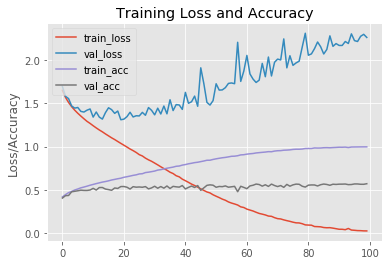

In [10]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()


In [0]:
#We will improve the validation performance using CNN